Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "Petruc Rares";

---

# Laborator 12-13: Derivare numerică
### Autor: Radu Stochitoiu

## Functii ajutatoare

In [2]:
function plot_taylor(f, t0, x0, h, N, approx)
    xx = linspace(t0, t0 + N * h);
    hold;
    plot(xx, f(xx));
    plot([x0:h:x0+N*h], approx, '.', 'markersize', 14);
endfunction

## Problema 1

Implementati funcția ```taylor_1(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$) ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

Taylor 1 = Euler

In [3]:
function [values] = taylor_1(df, t0, x0, h, N)
    values = zeros(1, N+1);
    values(1) = x0;
    t = [t0:h:t0+(N-1)*h];
    for k = 1:N
        values(k+1) = values(k) + h*df(t(k), values(k));
    endfor
    t(4)
endfunction

In [4]:
function [y] = df(t, x)
    y = x - t^2 + 1;
endfunction

t0 = 0; x0 = 0.5; h = 0.5; N = 4;
res = taylor_1(@df, t0, x0, h, N)

ans =  1.5000
res =

   0.50000   1.25000   2.25000   3.37500   4.43750



ans =  0.30000


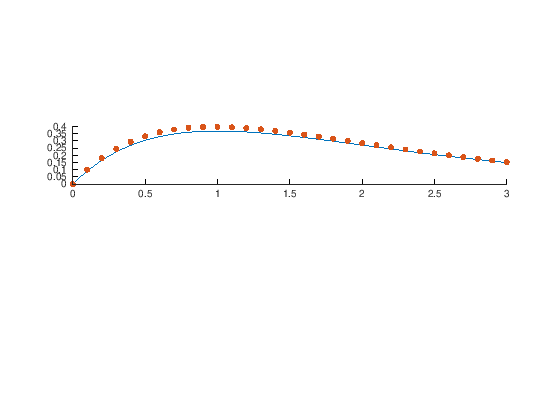

In [5]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.11);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

ans =  1.5000
ans =  0.30000
ans =  0.22500
ans =  0.10000


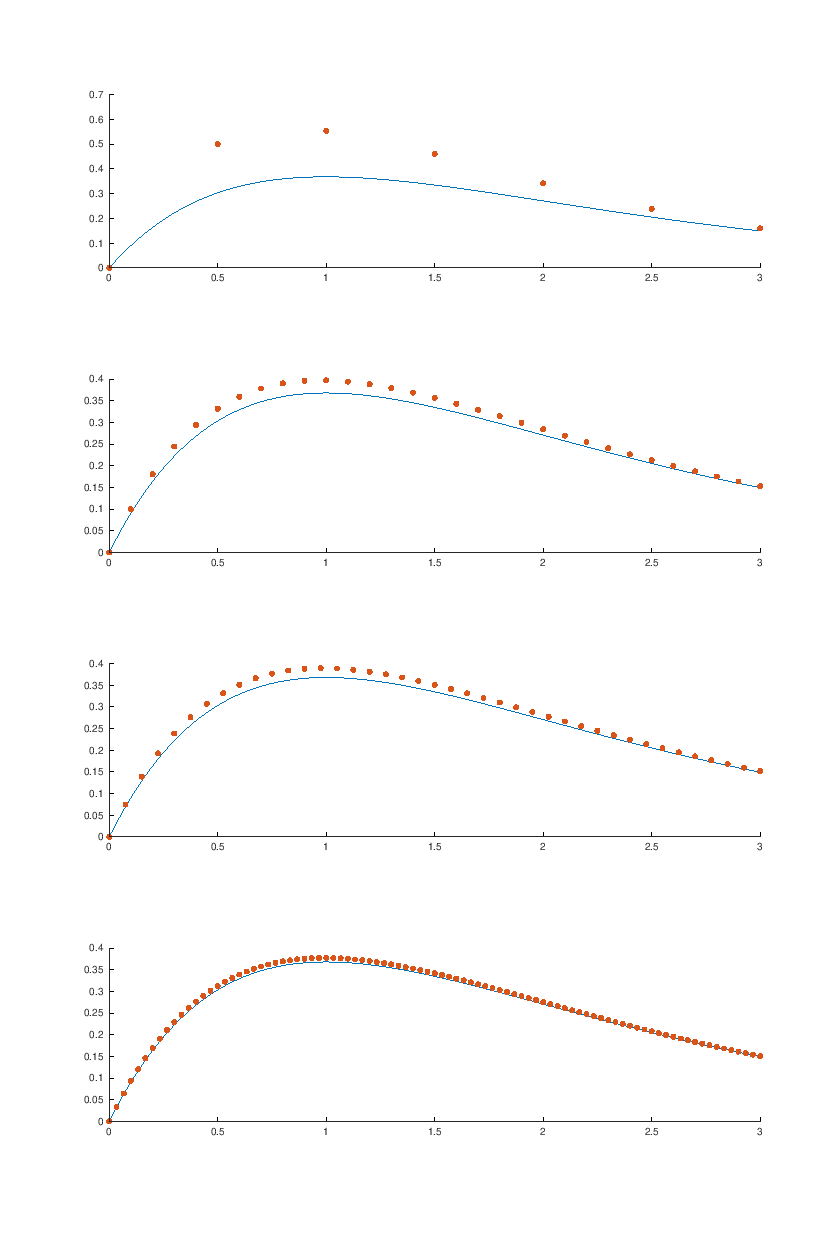

In [6]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.11);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.105);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = taylor_1(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 0.07);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 2

Implementati funcția ```taylor_2(df, dfdt, dfdx, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un handle la o funcție $dfdt$ (derivata parțială față de $t$ a lui $df$), un handle la o funcție $dfdx$ (derivata parțială față de $x$ a lui $df$), un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [7]:
%{
function [values] = taylor_1(df, t0, x0, h, N)
    values = zeros(1, N+1);
    values(1) = x0;
    t = [t0: t0+N-1];
    for k = 1:N
        values(k+1) = values(k) + h*df(t(k), values(k));
    endfor
endfunction
%}

function [values] = taylor_2(df, dfdt, dfdx, t0, x0, h, N)
    values = zeros(1, N+1);
    values(1) = x0;
    t = [t0:h:t0+(N-1)*h];
    for k = 1:N
        values(k+1) =  values(k) + h * df(t(k), values(k)) + (h^2/2)*(dfdt(t(k)) + dfdx(values(k)) * df(t(k), values(k)));
   endfor
endfunction 

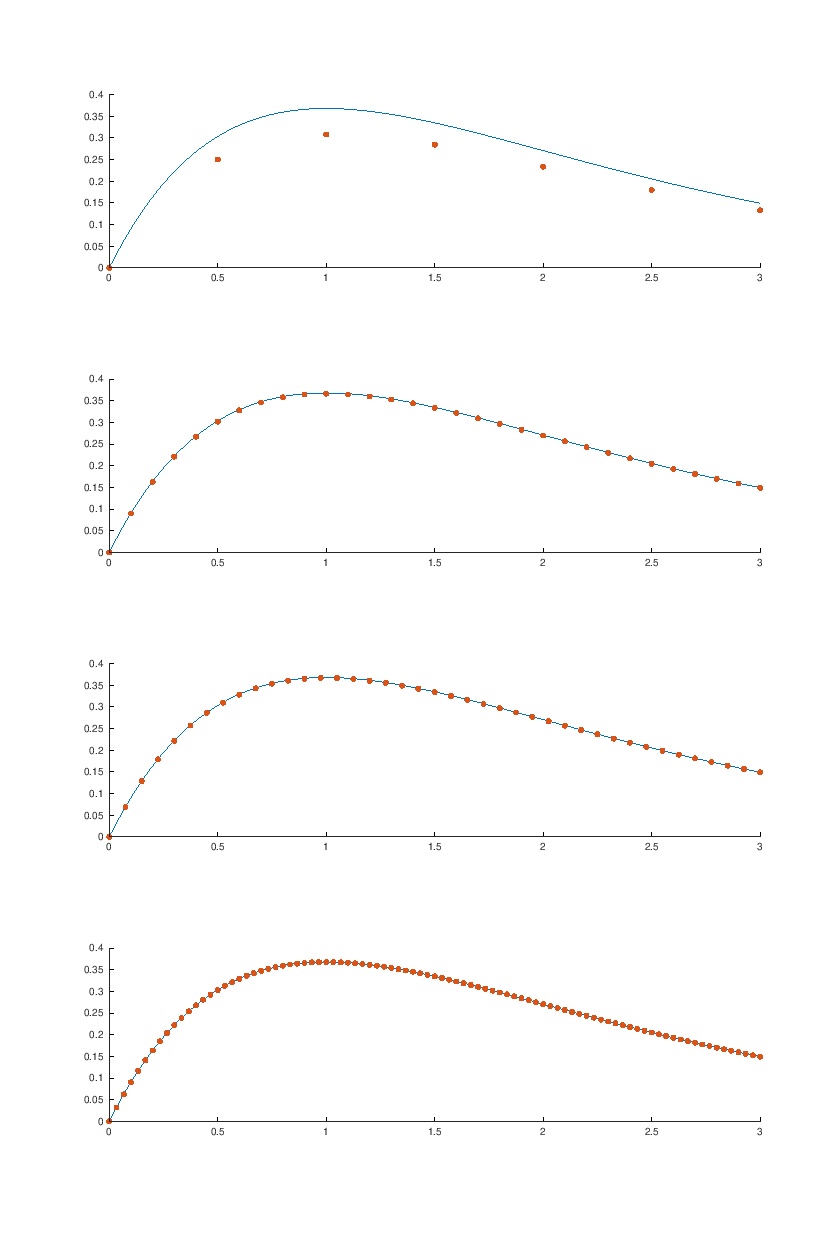

In [8]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

function[y] = dfdt(t)
    y = -exp(-t);
endfunction

function[y] = dfdx(x)
    y = -1;
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-3);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = taylor_2(@df, @dfdt, @dfdx, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 3

Implementati funcția ```rk2_heun(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [9]:
function [values] = rk2_heun(df, t0, x0, h, N)
    values = zeros(1, N+1);
    time = [t0:h:t0+N*h];
    
    values(1) = x0;
    time(1) = t0;
    
    for k = 2:N+1
    
        k1 = h*df(time(k-1), values(k-1));
        k2 = h*df(time(k), values(k-1)+k1);
        
        values(k) = values(k-1) + 1/2*(k1+k2);
    
    endfor
    
endfunction

In [10]:
function [y] = df(t, x)
    y = -3*x;
endfunction

t0 = 0; x0 = 1; h = 0.5; N = 2;
res = rk2_heun(@df, t0, x0, h, N)

res =

   1.00000   0.62500   0.39062



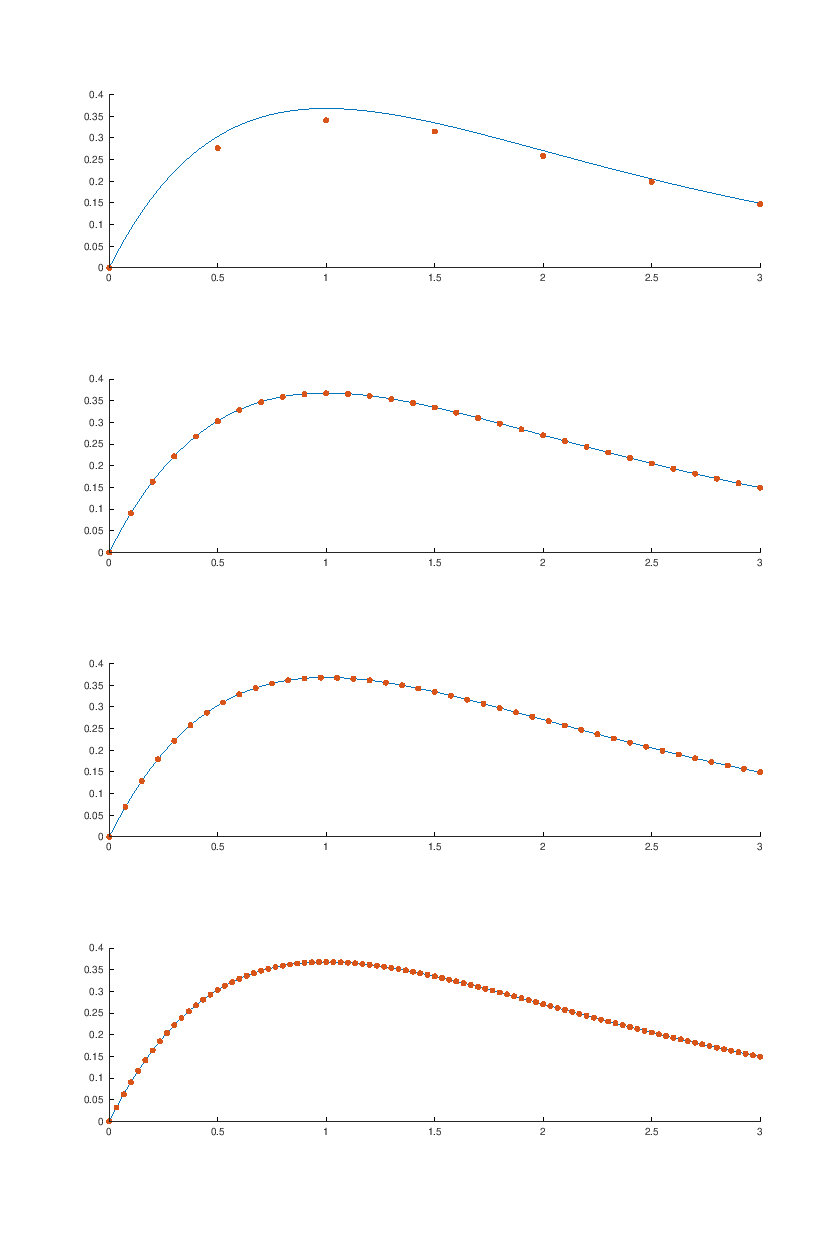

In [11]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.075; N = 40;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = rk2_heun(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 4

Implementati funcția ```rk4_classic(df, t0, x0, h, N)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, și numărul total de pași, $N$, și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [12]:
function [values] = rk4_classic(df, t0, x0, h, N)
    values = zeros(1, N+1);
    time = [t0:h:t0+N*h];
    
    values(1) = x0;
    time(1) = t0;
    
    for k = 2:N+1
    
        k1 = h*df(time(k-1), values(k-1));
        k2 = h*df(time(k-1)+1/2*h, values(k-1)+1/2*k1);
        k3 = h*df(time(k-1)+1/2*h, values(k-1)+1/2*k2);
        k4 = h*df(time(k-1) +h, values(k-1) + k3);
        
        
        values(k) = values(k-1) + 1/6*(k1+2*k2+2*k3+k4);
    
    endfor
    
endfunction

In [13]:
% lab 13_pb 2

function res = functie(x, y)
    res = y*sin(x) - 1;
endfunction

y = rk4_classic(@functie, 0, 0.5, 0.3, 10)

y =

 Columns 1 through 7:

   0.500000   0.213770  -0.079085  -0.431524  -0.902985  -1.557599  -2.447435

 Columns 8 through 11:

  -3.575427  -4.847639  -6.051285  -6.905223



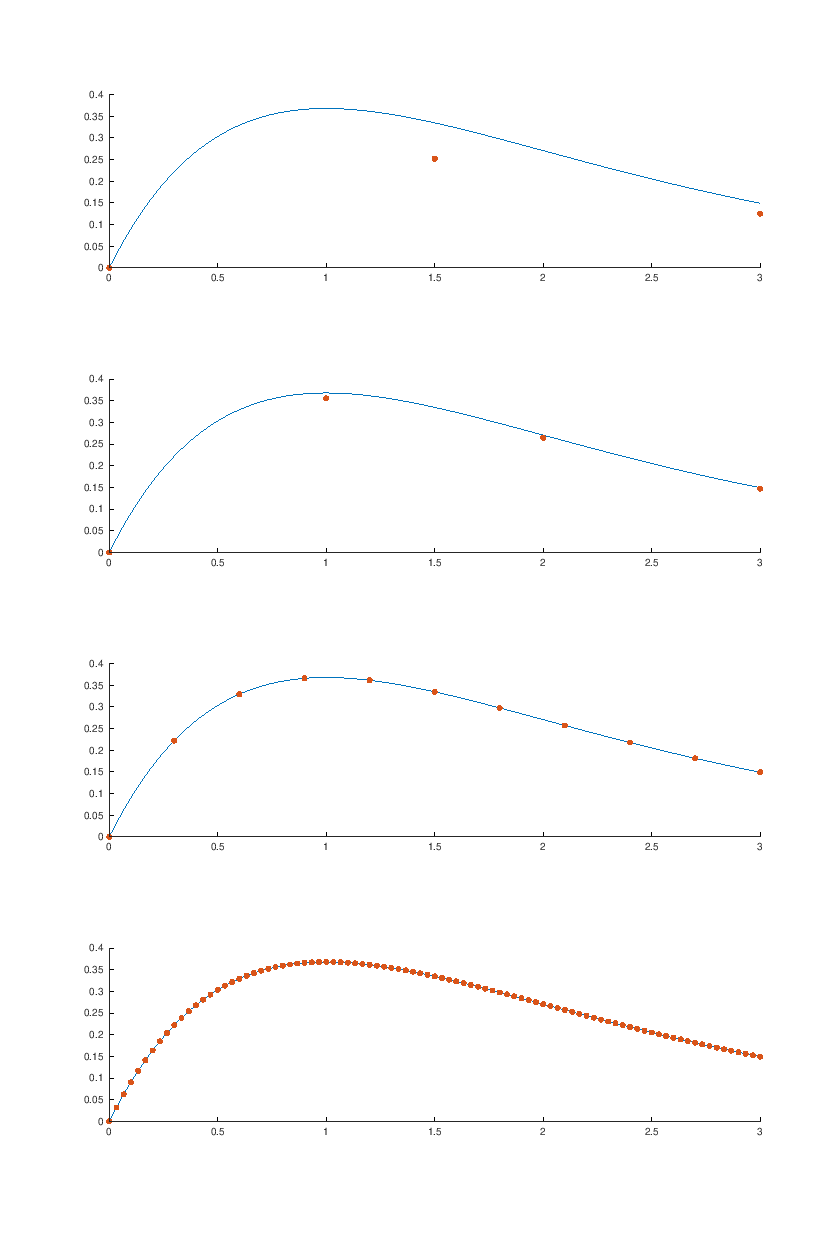

In [14]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 1.5; N = 2;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 1; N = 3;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-3);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.3; N = 10;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1 / 3; N = 90;
res = rk4_classic(@df, t0, x0, h, N);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-10);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 5

Implementati funcția ```ab2_explicit(df, t0, x0, h, N, initial_approximator)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, numărul total de pași, $N$, și un handle la o funcție ce va fi folosită pentru aproximarea inițială a lui $x_1$ și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [15]:
function [values] = ab2_explicit(df, t0, x0, h, N, initial_approximator)
    values = zeros(1, N+1);
    values(1:2) = initial_approximator(df, t0, x0, h, 1);
    time = [t0:h:t0+(N-1)*h];
    
    for k = 2:N
    
        f_n = df(time(k), values(k));
        f_n_1 = df(time(k-1), values(k-1));
    
        values(k+1) = values(k) + h/2*(3*f_n - f_n_1);
    
    endfor

endfunction

error: t(4): out of bound 1
error: called from
    taylor_1 at line 8 column 5
    ab2_explicit at line 3 column 17
error: operator -: nonconformant arguments (op1 is 1x91, op2 is 1x7)
error: __plt2vv__: vector lengths must match
error: called from
    __plt__>__plt2vv__ at line 489 column 5
    __plt__>__plt2__ at line 248 column 14
    __plt__ at line 113 column 17
    plot at line 223 column 10
    plot_taylor at line 5 column 5
error: t(4): out of bound 1
error: called from
    taylor_1 at line 8 column 5
    ab2_explicit at line 3 column 17
error: operator -: nonconformant arguments (op1 is 1x91, op2 is 1x13)
error: __plt2vv__: vector lengths must match
error: called from
    __plt__>__plt2vv__ at line 489 column 5
    __plt__>__plt2__ at line 248 column 14
    __plt__ at line 113 column 17
    plot at line 223 column 10
    plot_taylor at line 5 column 5
error: t(4): out of bound 1
error: called from
    taylor_1 at line 8 column 5
    ab2_explicit at line 3 column 17
error: oper

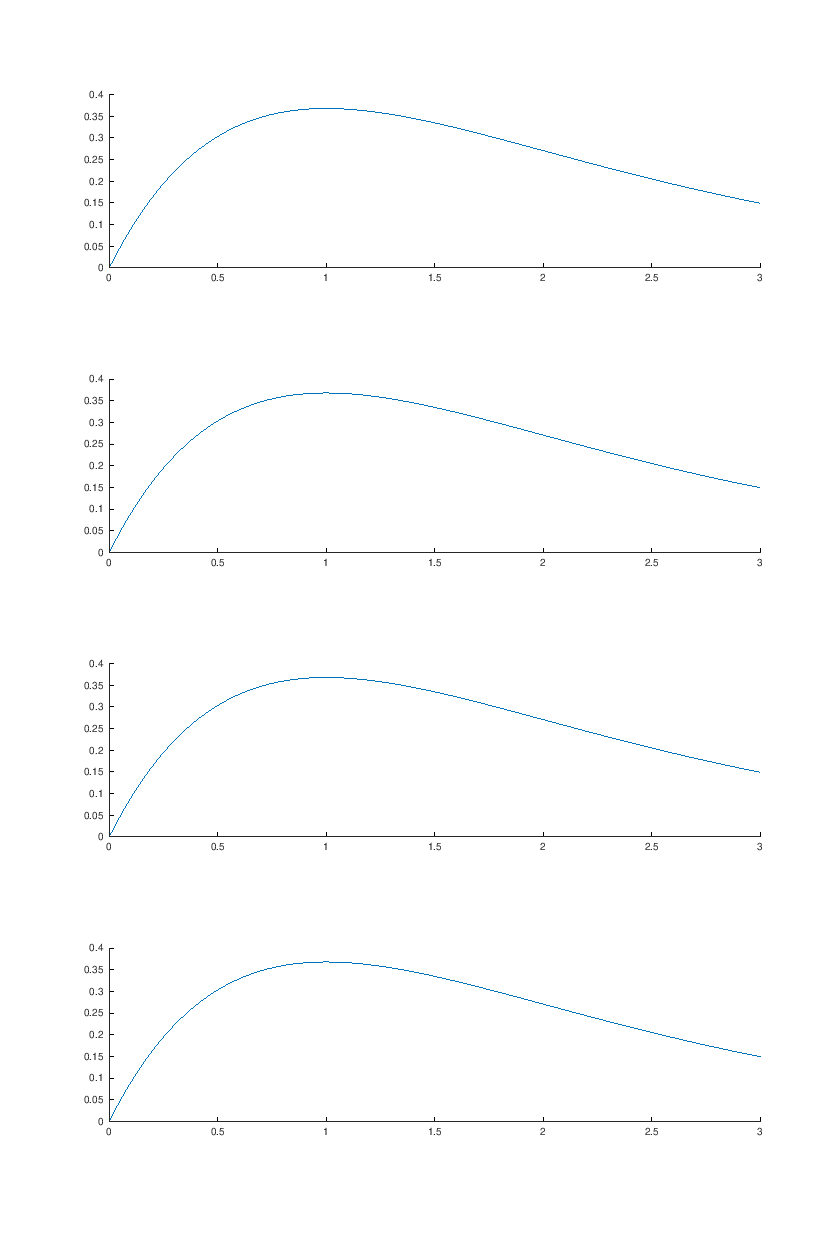

In [16]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @taylor_1);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

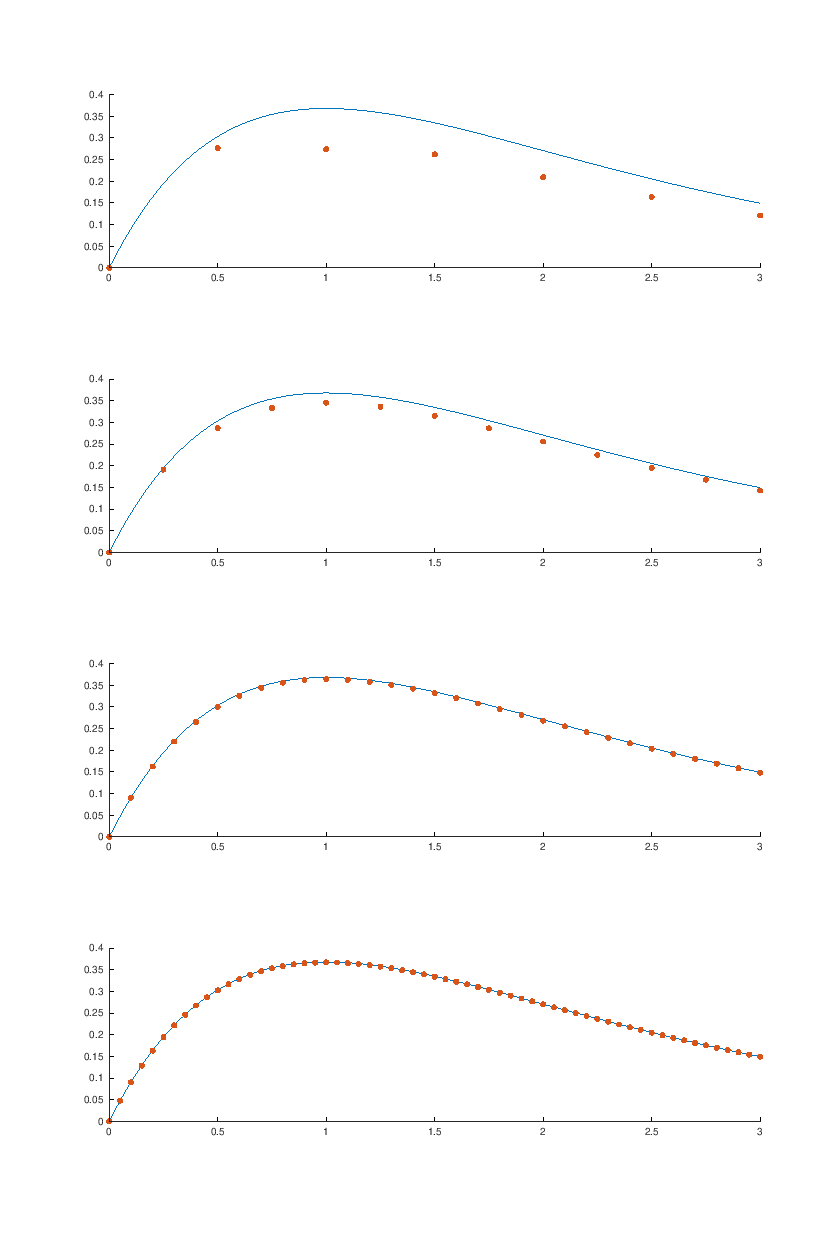

In [17]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-1);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @rk2_heun);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

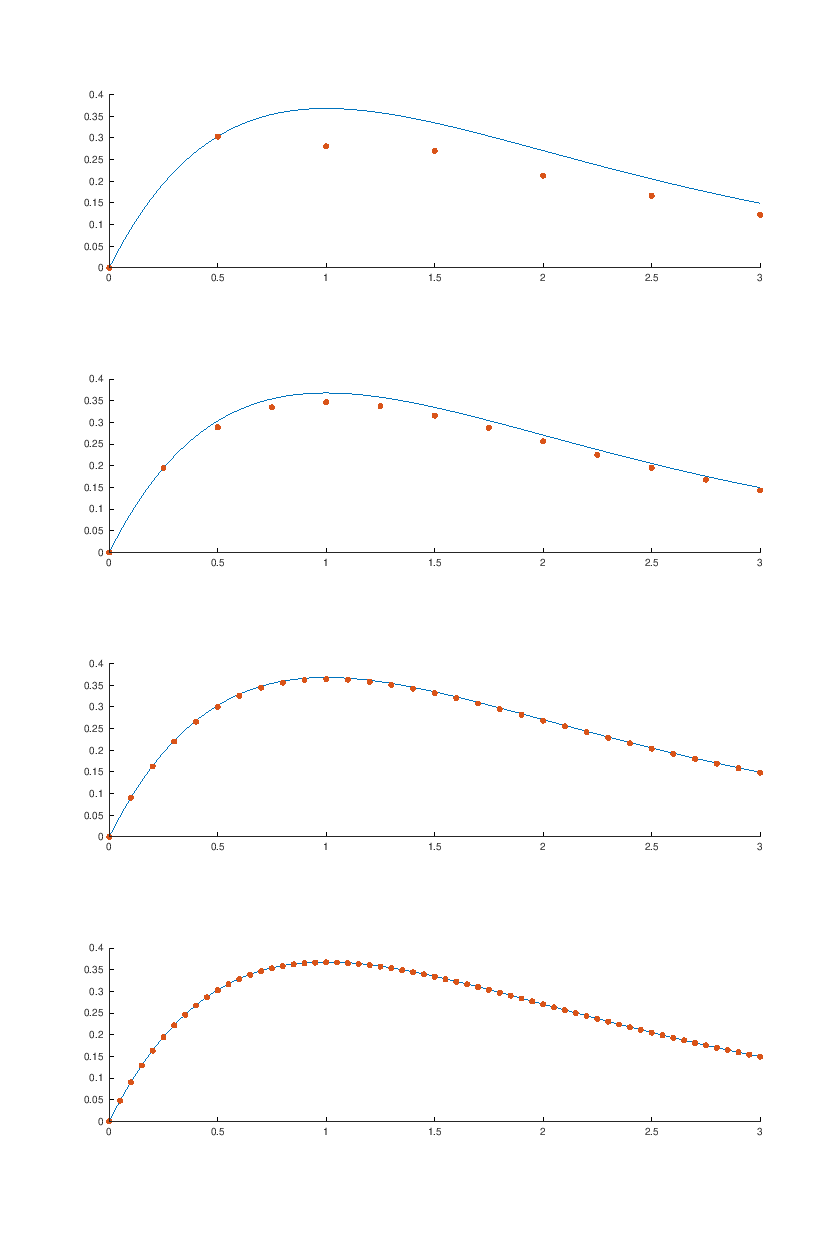

In [18]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = ab2_explicit(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 1e-4);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

## Problema 6

Implementati funcția ```abm_multistep(df, t0, x0, h, N, initial_approximator)``` ce primește un handle la o funcție $df$ de doi parametri ($t, x$), ce reprezintă derivata lui $x(t)$, un timp inițial $t_0$, o valoare inițială a lui $x(t_0) = x_0$, mărimea unui pas, $h$, numărul total de pași, $N$, și un handle la o funcție ce va fi folosită pentru aproximarea inițială a lui $x_1$ și returnează un vector linie cu toate valorile aproximate $x(t_k)$ cu $k = 0..N$.

In [19]:
function [values] = abm_multistep(df, t0, x0, h, N, initial_approximator)
    values = zeros(1, N+1);
    time = [t0:h:t0+N*h];
    
    values(1:2) = initial_approximator(df, t0, x0, h, 1);
    
    for k = 2:N
    
        fk_1 = df(time(k-1), values(k-1));
        fk = df(time(k), values(k));
    
        x_k_1_ = values(k) + h/2*(3*fk - fk_1);
        
        f_k_1_ = df(time(k+1), x_k_1_);
        
        values(k+1) = values(k) + h/2*(f_k_1_ + fk);
    
    endfor
    
endfunction

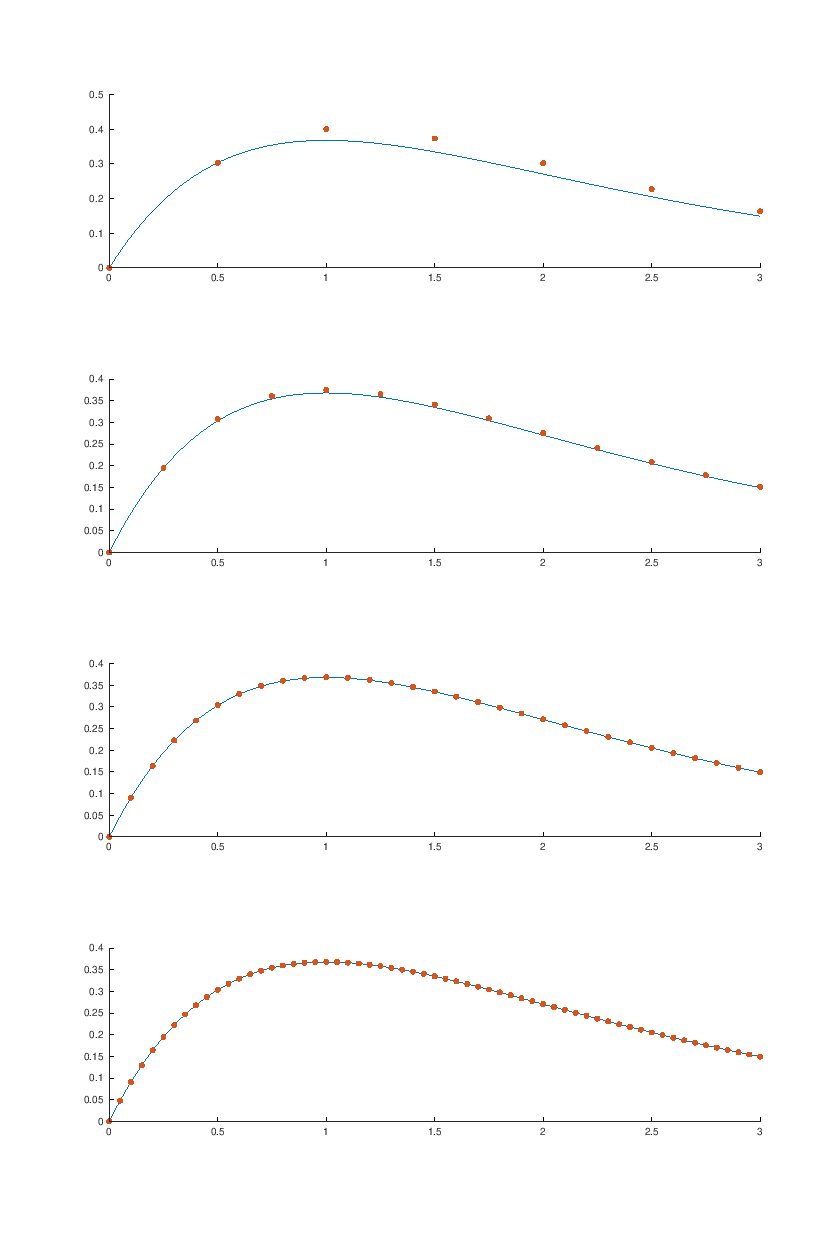

In [20]:
function [y] = f(t)
    y = t .* exp(-t);
endfunction

function [y] = df(t, x)
    y = -x + exp(-t);
endfunction

t0 = 0; x0 = 0; h = 0.5; N = 6;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 1);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.25; N = 12;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-2);
subplot(4, 1, 2);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.1; N = 30;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-4);
subplot(4, 1, 3);
plot_taylor(@f, t0, x0, h, N, res);

t0 = 0; x0 = 0; h = 0.05; N = 60;
res = abm_multistep(@df, t0, x0, h, N, @rk4_classic);
err = norm(res - f([t0:h:t0+N*h]));
assert(err / N < 5e-5);
subplot(4, 1, 4);
plot_taylor(@f, t0, x0, h, N, res);

pos = get(gcf,'Position');
pos(3) *= 1.5;
pos(4) *= 3;
set(gcf, 'Position', pos);

In [21]:
% metoda tangentei ameliorate __lab_13

In [22]:
function res = functie(x, y)
    res = y*sin(x) - 1;
endfunction

In [23]:
function y = tangentaAmel(a, b, n, y0, f)

    h = (b-a)/n;

    x = [a:h:b];

    y = y0;

    for i = 2:n+1
    
        k1 = x(i-1) + h/2;
        k2 = y(i-1) + h/2*f(x(i-1), y(i-1));
    
        y = [y, y(i-1) + h*f(k1, k2)];
    
    endfor
    
endfunction

In [24]:
y = tangentaAmel(0, 3, 10, 0.5, @functie)

y =

 Columns 1 through 7:

   0.500000   0.215691  -0.074489  -0.421686  -0.883347  -1.521975  -2.390099

 Columns 8 through 11:

  -3.495294  -4.751827  -5.952477  -6.811686



In [25]:
% RK4_CLASSIC CU TRIDIAGONAL